In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
import sys
import simpy

In [13]:
def clock(env, name, tick):
    while True:
        print(name, env.now)
        yield env.timeout(tick)

env = simpy.Environment()
env.process(clock(env, 'fast', 0.5))

env.process(clock(env, 'slow', 1))
env.run(until=2)


fast 0
slow 0
fast 0.5
slow 1
fast 1.0
fast 1.5


# Introduction to data

In [14]:
df = pd.read_csv('AsylKBG.csv', delimiter=';')
df.head() ## первые пять строк

,Static-pure,Static-elitist,Stochastic- pure,Stochastic- elitist
0,0.101307,0.101307,0.101307,0.101307
1,0.126394,0.126394,0.126401,0.126394
2,0.140380,0.140380,0.140380,0.140380
3,0.068513,0.068513,0.068513,0.068513
4,0.085622,0.085599,0.085600,0.085596


In [15]:
df.columns

Index(['Static-pure', 'Static-elitist', 'Stochastic- pure',
       'Stochastic- elitist'],
      dtype='object')

In [16]:
df.shape # 0-999 строк, 4 колонны

(999, 4)

In [17]:
df.isnull().sum() ## проверяем на нулевый данные

Static-pure            0
Static-elitist         0
Stochastic- pure       0
Stochastic- elitist    0
dtype: int64

# Data preprocessing

## Remove outliers

### outlier min - минимальный барьер для данных, формула = 


In [18]:
outlier_min = df.quantile(q=0.25, interpolation='midpoint') - \
                1.5*(df.quantile(q=0.75, interpolation='midpoint') - df.quantile(q=0.25, interpolation='midpoint'))
outlier_min

Static-pure           -0.003931
Static-elitist        -0.003940
Stochastic- pure      -0.004029
Stochastic- elitist   -0.004099
dtype: float64

In [19]:
df[df['Static-pure'] < outlier_min['Static-pure']]

,Static-pure,Static-elitist,Stochastic- pure,Stochastic- elitist


In [20]:
df[df['Static-elitist'] < outlier_min['Static-elitist']]

,Static-pure,Static-elitist,Stochastic- pure,Stochastic- elitist


In [21]:
df[df['Stochastic- pure'] < outlier_min['Stochastic- pure']]

,Static-pure,Static-elitist,Stochastic- pure,Stochastic- elitist


In [22]:
df[df['Stochastic- elitist'] < outlier_min['Stochastic- elitist']]

,Static-pure,Static-elitist,Stochastic- pure,Stochastic- elitist


### outlier max

In [23]:
outlier_max = df.quantile(q=0.75, interpolation='midpoint') + \
                1.5*(df.quantile(q=0.75, interpolation='midpoint') - df.quantile(q=0.25, interpolation='midpoint'))
outlier_max

Static-pure            0.127640
Static-elitist         0.127645
Stochastic- pure       0.127699
Stochastic- elitist    0.127741
dtype: float64

In [24]:
df[df['Static-pure'] > outlier_max['Static-pure']]

,Static-pure,Static-elitist,Stochastic- pure,Stochastic- elitist
2,0.14038,0.14038,0.14038,0.14038
32,0.14038,0.14038,0.14038,0.14038
62,0.14038,0.14038,0.14038,0.14038
92,0.14038,0.14038,0.14038,0.14038
122,0.14038,0.14038,0.14038,0.14038
125,0.14038,0.14038,0.14038,0.14038
155,0.14038,0.14038,0.14038,0.14038
185,0.14038,0.14038,0.14038,0.14038
188,0.14038,0.14038,0.14038,0.14038
218,0.14038,0.14038,0.14038,0.14038


In [25]:
indexOfData = df[df['Static-pure'] > outlier_max['Static-pure']].index
indexOfData

Int64Index([  2,  32,  62,  92, 122, 125, 155, 185, 188, 218, 248, 251, 281,
            311, 314, 344, 374, 377, 407, 437, 440, 470, 500, 503, 533, 563,
            566, 596, 626, 629, 659, 689, 692, 722, 752, 755, 785, 815, 818,
            848, 878, 881, 911, 941, 944, 974],
           dtype='int64')

In [26]:
for x in indexOfData: ## удаляем слишком левые данные
    if x in df.index:
        df.drop(x, inplace=True)

In [27]:
df.head()

,Static-pure,Static-elitist,Stochastic- pure,Stochastic- elitist
0,0.101307,0.101307,0.101307,0.101307
1,0.126394,0.126394,0.126401,0.126394
3,0.068513,0.068513,0.068513,0.068513
4,0.085622,0.085599,0.085600,0.085596
5,0.107042,0.107042,0.107042,0.107042


## Visualization

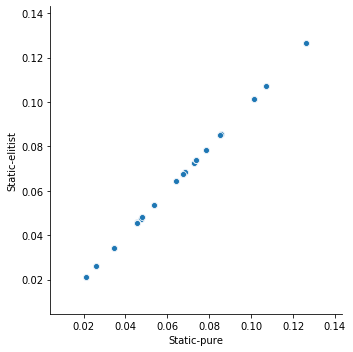

In [28]:
sns.relplot(x='Static-pure',y='Static-elitist',data=df) 

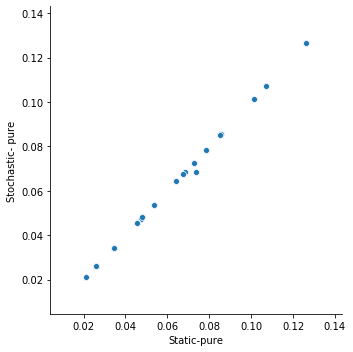

In [29]:
sns.relplot(x='Static-pure',y='Stochastic- pure',data=df)

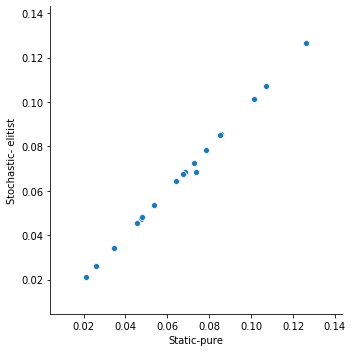

In [30]:
sns.relplot(x='Static-pure',y='Stochastic- elitist',data=df)

## Model

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

мы хотим найти значение 	Stochastic- elitist, благодаря 'Static-pure','Stochastic- pure', 'Stochastic- elitist'

In [32]:
train_df = df.loc[:,['Static-pure','Stochastic- pure', 'Stochastic- elitist']]
train_df.head() #дата для тренировки модели

,Static-pure,Stochastic- pure,Stochastic- elitist
0,0.101307,0.101307,0.101307
1,0.126394,0.126401,0.126394
3,0.068513,0.068513,0.068513
4,0.085622,0.085600,0.085596
5,0.107042,0.107042,0.107042


In [33]:
test_df = df.iloc[:,-1:] #	Stochastic- elitist
test_df.head()  #что хотим найти

,Stochastic- elitist
0,0.101307
1,0.126394
3,0.068513
4,0.085596
5,0.107042


In [34]:
regr = LinearRegression()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(train_df,test_df,test_size=0.3,random_state=2)
# X_train => 50% => Static-pure	Stochastic-pure Stochastic- elitist
# X_test => 50%

#y_train => 50% =>Stochastic- elitist


In [36]:
regr.fit(X_train, y_train) #loading model with data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
pred = regr.predict(X_test) #making prediction => y_test

In [38]:
pred

array([[0.06857728],
       [0.12639392],
       [0.07830092],
       [0.07830092],
       [0.06857728],
       [0.04571052],
       [0.07267144],
       [0.02124183],
       [0.06857728],
       [0.07830092],
       [0.04541532],
       [0.05363697],
       [0.07267144],
       [0.04738562],
       [0.06857728],
       [0.02614379],
       [0.10130719],
       [0.06857728],
       [0.06857728],
       [0.07267144],
       [0.10130719],
       [0.0480147 ],
       [0.10704225],
       [0.02124183],
       [0.10130719],
       [0.08559586],
       [0.06851312],
       [0.02614379],
       [0.07267144],
       [0.04534079],
       [0.05363697],
       [0.06417583],
       [0.02124183],
       [0.07830092],
       [0.08520179],
       [0.02124183],
       [0.06825939],
       [0.06825939],
       [0.05363697],
       [0.08520179],
       [0.02124183],
       [0.04540857],
       [0.04541532],
       [0.03431373],
       [0.04571052],
       [0.03431373],
       [0.04534079],
       [0.068

In [39]:
y_test

,Stochastic- elitist
152,0.068577
187,0.126394
890,0.078301
953,0.078301
623,0.068577
...,...
75,0.021242
3,0.068513
360,0.021242
473,0.107042
